In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
dataset = pd.read_csv("crime_data.csv")

In [3]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [4]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(dataset.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


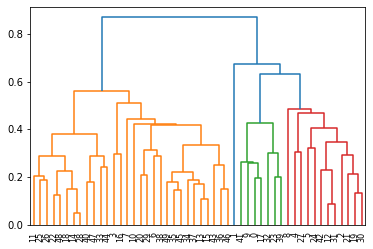

In [5]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

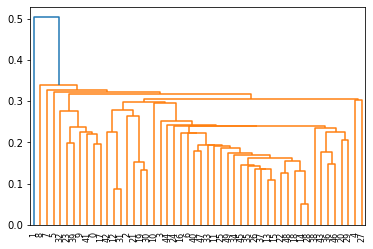

In [6]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

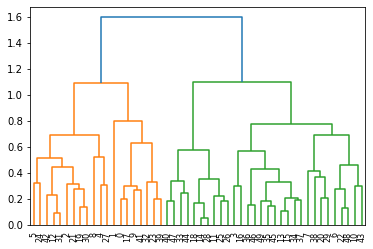

In [7]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

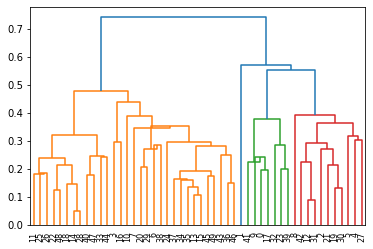

In [8]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

In [9]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [10]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [11]:
dataset['h_clusterid'] = hc.labels_

In [12]:
dataset

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


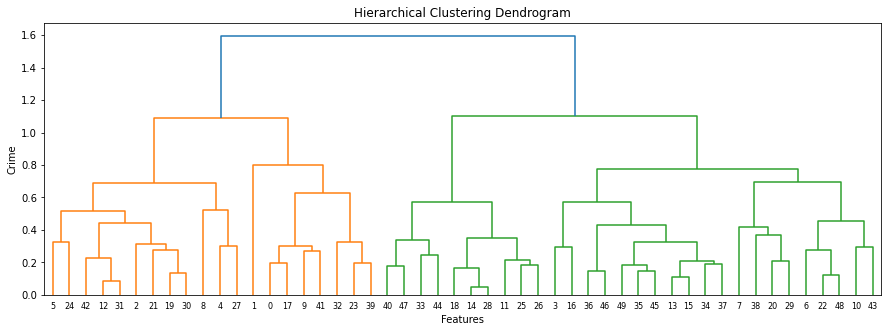

In [28]:

from scipy.cluster.hierarchy import linkage 
z = linkage(df_norm, method="complete",metric="euclidean")
z

plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Crime')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


In [49]:
## kmeans clustering

k = list(range(2,15))
k


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [50]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [31]:
TWSS = [] 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = []
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))


([<matplotlib.axis.XTick at 0x283e0ac8cd0>,
 <a list of 13 Text major ticklabel objects>)

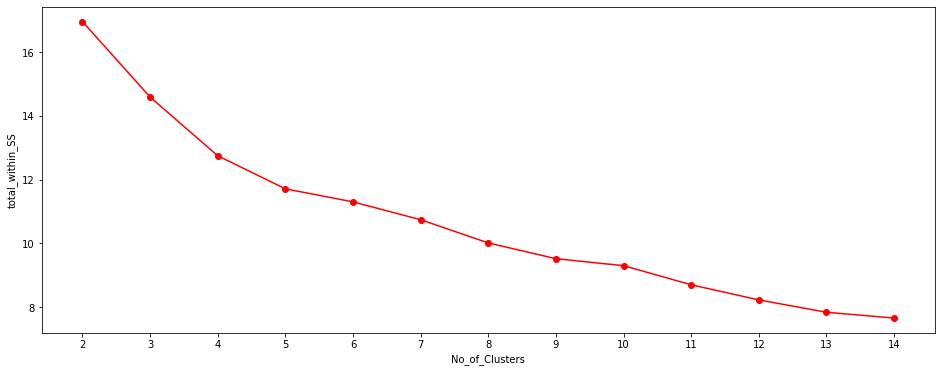

In [32]:
plt.figure(figsize=(16,6))
plt.plot(k,TWSS,'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)



In [33]:
model=KMeans(n_clusters=4) 
model.fit(df_norm)



KMeans(n_clusters=4)

In [34]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)



KMeans(n_clusters=4, n_jobs=None, precompute_distances='auto')

In [35]:
model.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [36]:
model.cluster_centers_



array([[0.29254518, 0.32148973, 0.70974576, 0.29667313],
       [0.60333642, 0.72734457, 0.74576271, 0.66905188],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [39]:
X = dataset[['Murder', 'Assault', 'Rape', 'UrbanPop']]
clusters = KMeans(4)  # 4 clusters!
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_
dataset['Crime_clusters'] = clusters.labels_
dataset.head()
dataset.sort_values(by=['Crime_clusters'],ascending = True)
X.head()

,Murder,Assault,Rape,UrbanPop
0,13.2,236,21.2,58
1,10.0,263,44.5,48
2,8.1,294,31.0,80
3,8.8,190,19.5,50
4,9.0,276,40.6,91


In [43]:
stats =dataset.sort_values("Murder", ascending=True)
stats


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new,Crime_clusters
33,North Dakota,0.8,45,44,7.3,0,1,3
28,New Hampshire,2.1,57,56,9.5,0,1,3
18,Maine,2.1,83,51,7.8,0,1,3
14,Iowa,2.2,56,57,11.3,0,1,3
44,Vermont,2.2,48,32,11.2,0,1,3
48,Wisconsin,2.6,53,66,10.8,0,1,3
11,Idaho,2.6,120,54,14.2,0,1,1
22,Minnesota,2.7,72,66,14.9,0,1,3
43,Utah,3.2,120,80,22.9,0,2,1
6,Connecticut,3.3,110,77,11.1,0,2,1


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


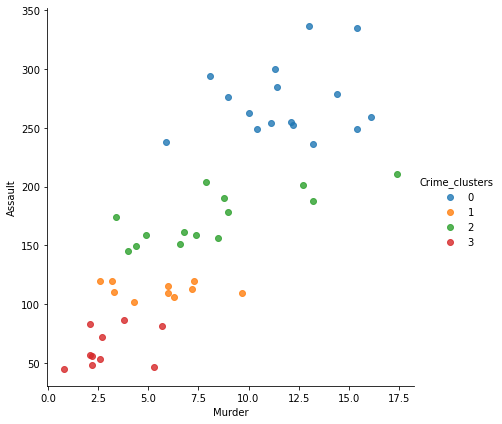

In [45]:
import seaborn as sns
sns.lmplot( 'Murder','Assault',  data=dataset,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


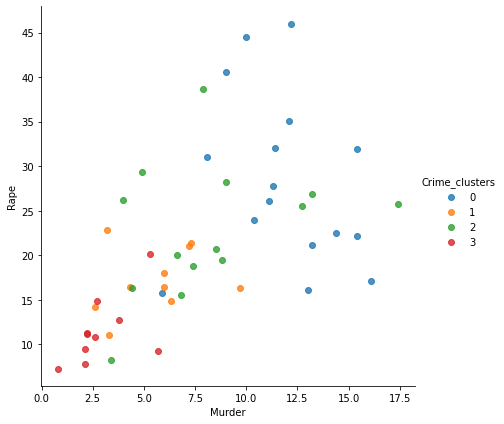

In [46]:
sns.lmplot( 'Murder','Rape',  data=dataset,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


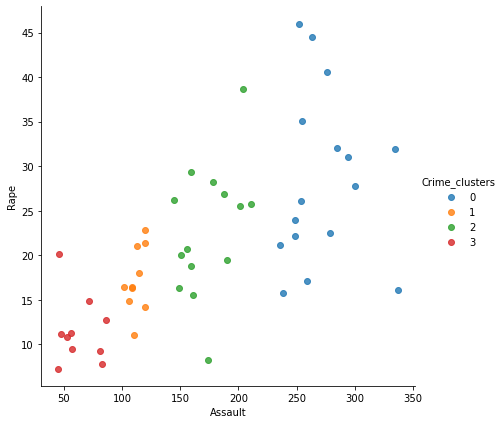

In [47]:
sns.lmplot( 'Assault','Rape',  data=dataset,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );


In [48]:
Clusters

,Clusters
0,0
1,3
2,0
3,0
4,0
5,0
6,0
7,1
8,2
9,0
